In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("ToyotaCorolla560.csv")
df.head()

,Price,Age,KM,FuelType,Horsepower,MetColor,Automatic
0,20500,12,5000,Petrol,110,1,0
1,20950,14,5278,Petrol,110,1,1
2,11250,47,5309,Petrol,110,1,1
3,19950,14,5459,Petrol,110,1,0
4,19950,14,6000,Petrol,110,0,0


## How many of each item per column

In [3]:
df.nunique()

Price          220
Age             70
KM            1225
FuelType         2
Horsepower      11
MetColor         2
Automatic        2
dtype: int64

In [12]:
df.FuelType.nunique()

2

In [4]:
df.FuelType.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [13]:
df.FuelType.value_counts()

Petrol    1244
Diesel     137
Name: FuelType, dtype: int64

## Replace with 0 & 1 for diesel & Petron
### 1. .replace()
### 2. .map()
### 3. .apply(lambda x:)

In [5]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'Horsepower', 'MetColor',
       'Automatic'],
      dtype='object')

In [6]:
df['FuelTypeReplace'] = df['FuelType'].replace({'Petrol': 1, 'Diesel': 0})

In [7]:
df['FuelTypeMap'] = df['FuelType'].map({'Petrol': 1, 'Diesel': 0})

In [8]:
df['FuelTypeLambda'] = df['FuelType'].apply(lambda x: 1 if x == 'Petrol' else 0)

# 
you first convert the column to a categorical type with ordered categories. 
Then, you use astype('category').cat.codes to convert the categories to numeric codes.
This method assigns numbers to the categories based on their alphabetical order. If the order matters ('Yes' should be 1 and 'No' should be 0), 
you may need to explicitly define the category order.

In [9]:
# Convert to categorical type and then to numeric codes
df['FuelTypeAsType'] = df['FuelType'].astype('category').cat.codes
df.head()

,Price,Age,KM,FuelType,Horsepower,MetColor,Automatic,FuelTypeReplace,FuelTypeMap,FuelTypeLambda,FuelTypeAsType
0,20500,12,5000,Petrol,110,1,0,1,1,1,1
1,20950,14,5278,Petrol,110,1,1,1,1,1,1
2,11250,47,5309,Petrol,110,1,1,1,1,1,1
3,19950,14,5459,Petrol,110,1,0,1,1,1,1
4,19950,14,6000,Petrol,110,0,0,1,1,1,1


In [10]:
dummies = pd.get_dummies(df['FuelType'], drop_first=True)
df['FuelTypeDummies'] = dummies
df.head()

,Price,Age,KM,FuelType,Horsepower,MetColor,Automatic,FuelTypeReplace,FuelTypeMap,FuelTypeLambda,FuelTypeAsType,FuelTypeDummies
0,20500,12,5000,Petrol,110,1,0,1,1,1,1,1
1,20950,14,5278,Petrol,110,1,1,1,1,1,1,1
2,11250,47,5309,Petrol,110,1,1,1,1,1,1,1
3,19950,14,5459,Petrol,110,1,0,1,1,1,1,1
4,19950,14,6000,Petrol,110,0,0,1,1,1,1,1


In [11]:
df.tail()

,Price,Age,KM,FuelType,Horsepower,MetColor,Automatic,FuelTypeReplace,FuelTypeMap,FuelTypeLambda,FuelTypeAsType,FuelTypeDummies
1376,6950,76,191620,Diesel,72,0,0,0,0,0,0,0
1377,5950,68,194545,Petrol,86,0,0,1,1,1,1,1
1378,6150,80,194765,Diesel,72,0,0,0,0,0,0,0
1379,8500,69,197501,Diesel,72,0,0,0,0,0,0,0
1380,6400,51,198167,Diesel,69,0,0,0,0,0,0,0


## Visualize the data

In [19]:
# Calculate the correlation matrix
df['FuelType'] = df['FuelType'].map({'Petrol': 1, 'Diesel': 0})
corr = df.corr()


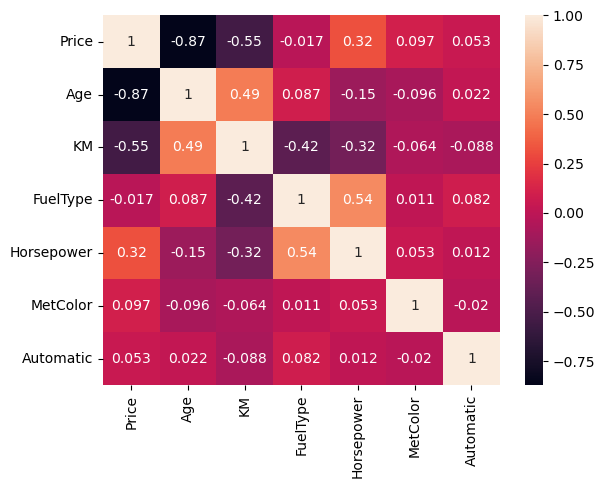

In [20]:
# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

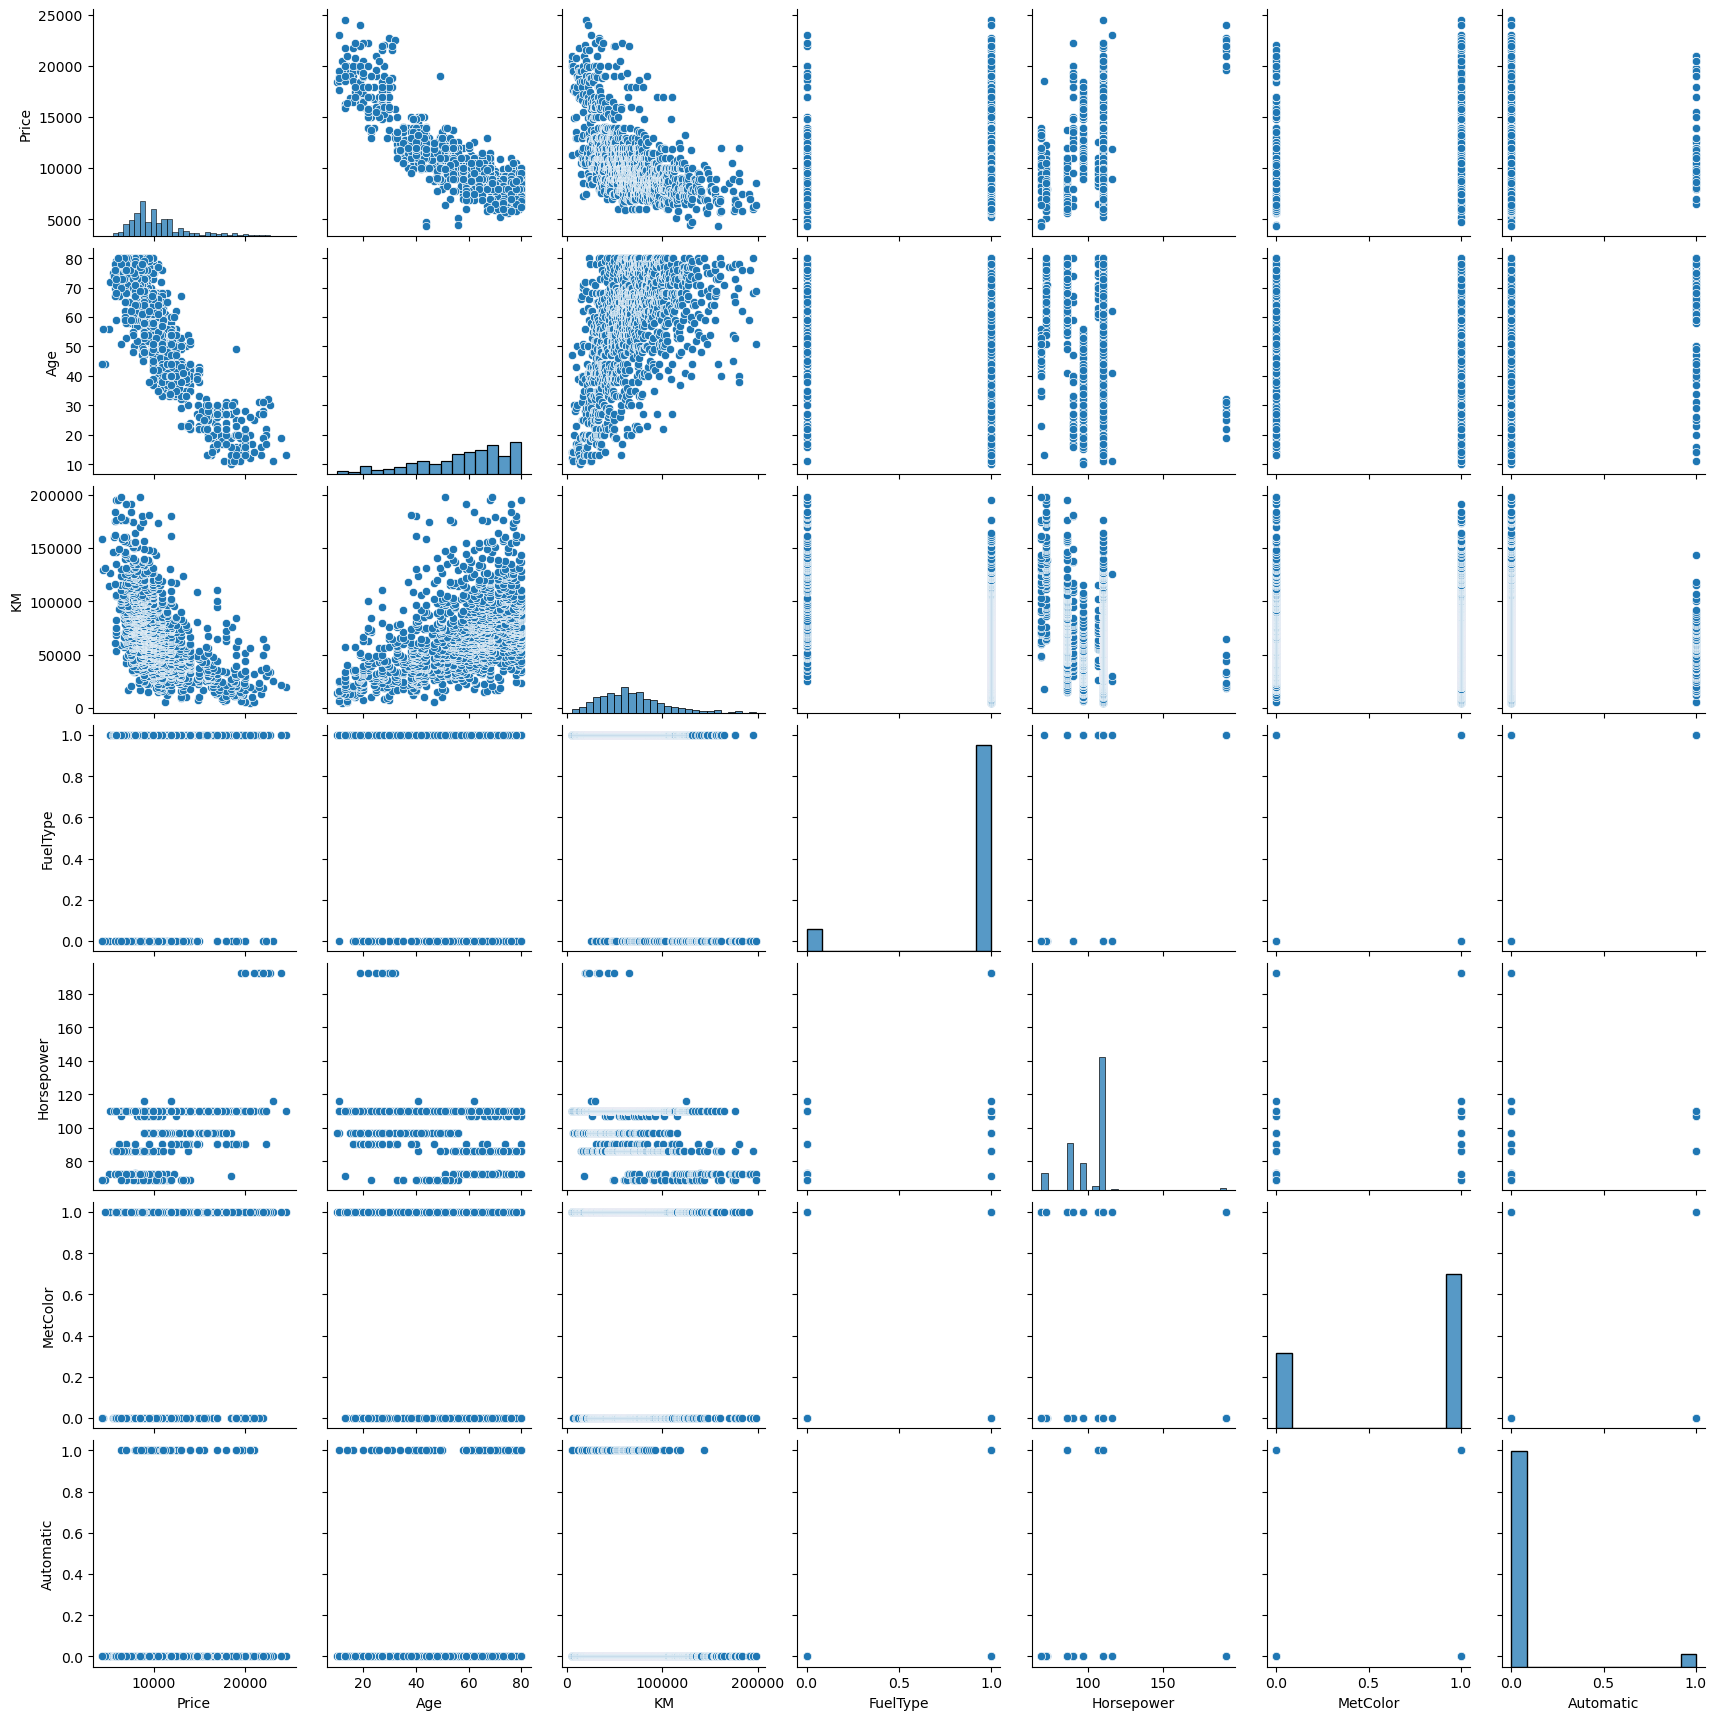

In [21]:
sns.pairplot(df)
plt.show()

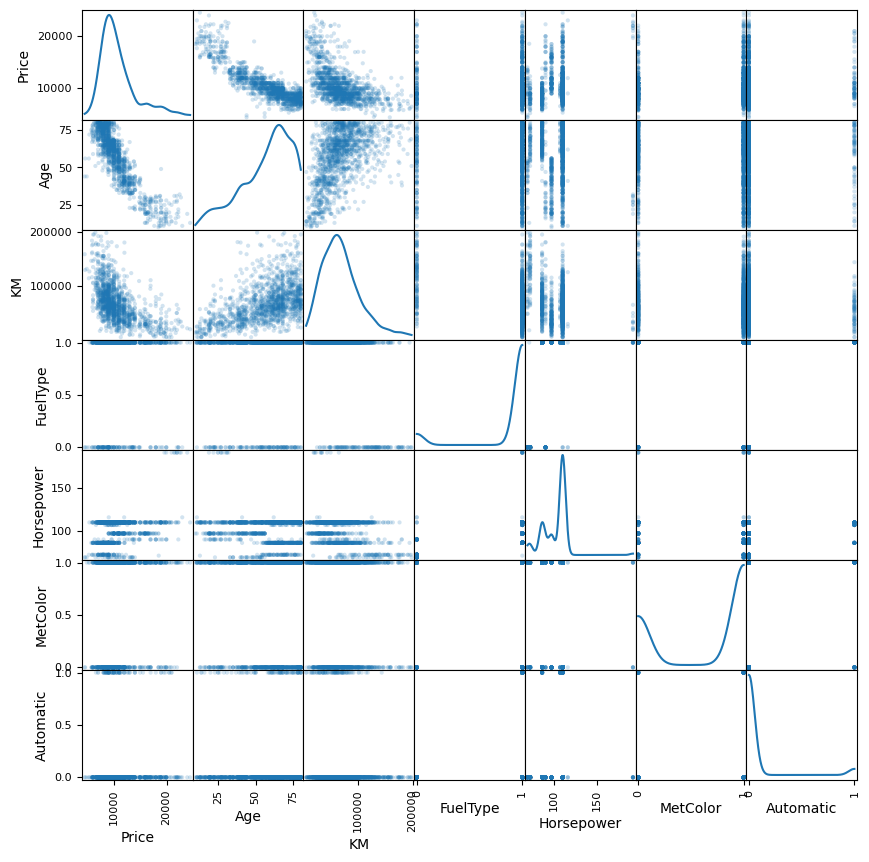

In [23]:
from pandas.plotting import scatter_matrix

# Plot scatter matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()